<a href="https://colab.research.google.com/github/Anshad-Aziz/VOIS_INTERNSHIP/blob/main/CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
len(label)

10

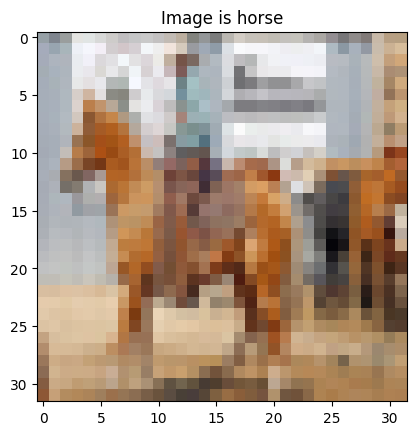

In [6]:
import matplotlib.pyplot as plt
i = np.random.randint(1,50000)
op = label[y_train[i][0]]
plt.imshow(x_train[i])
plt.title(f'Image is {op}')
plt.show()

In [7]:
x_train =x_train/255
x_test = x_test/255

In [8]:
32*32*3

3072

In [9]:

# Build a ANN model

ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
ann.add(tf.keras.layers.Dense(2048,activation='relu'))
ann.add(tf.keras.layers.Dense(1024,activation='relu'))
ann.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 8401930 (32.05 MB)
Trainable params: 8401930 (32.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.8765 - accuracy: 0.3283 - val_loss: 1.7503 - val_accuracy: 0.3742
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6750 - accuracy: 0.3986 - val_loss: 1.6261 - val_accuracy: 0.4205
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6053 - accuracy: 0.4222 - val_loss: 1.5606 - val_accuracy: 0.4456
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5544 - accuracy: 0.4409 - val_loss: 1.6019 - val_accuracy: 0.4265
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5159 - accuracy: 0.4541 - val_loss: 1.5151 - val_accuracy: 0.4626
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4824 - accuracy: 0.4666 - val_loss: 1.5512 - val_accuracy: 0.4454
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4606 - accuracy: 0.4774 - val_loss: 1.5099 - val_accurac

In [15]:
import time

# Your code here...

t0 = time.time()
# Perform some actions or calculations...
t1 = time.time() - t0
print("ann_exe_time:", t1)


ann_exe_time: 7.963180541992188e-05


In [16]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(64,activation='relu'))
cnn1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [17]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 512)              

In [18]:
cnn1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [19]:
cnn1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.6225 - accuracy: 0.4039 - val_loss: 1.3583 - val_accuracy: 0.5081
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2880 - accuracy: 0.5339 - val_loss: 1.2616 - val_accuracy: 0.5480
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1691 - accuracy: 0.5812 - val_loss: 1.1335 - val_accuracy: 0.5986
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0838 - accuracy: 0.6158 - val_loss: 1.0768 - val_accuracy: 0.6149
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0267 - accuracy: 0.6327 - val_loss: 1.0767 - val_accuracy: 0.6168
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9758 - accuracy: 0.6550 - val_loss: 1.0955 - val_accuracy: 0.6105
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9365 - accuracy: 0.6697 - val_loss: 1.0151 - val_accuracy